In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 's2(t)')

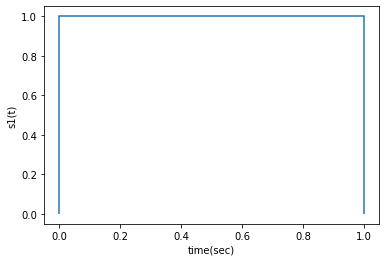

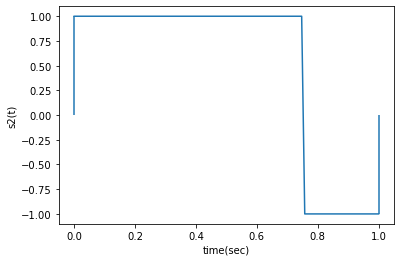

In [2]:
number_of_samples = 100
s2_part2_size = int(np.floor(number_of_samples*0.25))

s1 = np.ones(number_of_samples)
s2_part1 = np.ones(number_of_samples-s2_part2_size)
s2_part2 = np.ones(s2_part2_size) * -1
s2 = np.append(s2_part1, s2_part2)

x_axis_time = np.linspace(0,1,number_of_samples)

plt.figure()
plt.plot(x_axis_time,s1)
plt.vlines(x=0,ymin=0, ymax=1)
plt.vlines(x=1,ymin=0, ymax=1)
plt.xlabel("time(sec)")
plt.ylabel("s1(t)")

plt.figure()
plt.plot(x_axis_time,s2)
plt.vlines(x=0,ymin=0, ymax=1)
plt.vlines(x=1,ymin=-1, ymax=0)
plt.xlabel("time(sec)")
plt.ylabel("s2(t)")

In [3]:
def GM_Bases(s1,s2):
    # Get phi1
    #-------------
    # S1(t) = s11 phi1
    # s11 = sqrt(E1)
    # E1 = integration from 0 to T (S1 ^ 2)
    # phi1 = S1 / s11
    E1 = np.sum(s1 ** 2)/number_of_samples
    print(E1)
    s11 = np.sqrt(E1)
    phi1 = s1 / s11
    
    # Get phi2
    #-------------
    # S2(t) = s21 phi1 + s22 phi2
    # s21 = integration from 0 to T (S2 phi1)
    # g2 = s22 phi2 = S2 - s21 phi1
    # s22 = sqrt(E2)
    # E2 = integration from 0 to T (g2 ^ 2)
    # phi2 = g2 / s22
    s21 = np.sum(s2 * phi1)/number_of_samples
    g2 = s2 - s21 * phi1
    E2 = np.sum(g2 ** 2)/number_of_samples
    print(E2)
    s22 = np.sqrt(E2)
    phi2 = g2 / s22
    
    # if s1&s2 have one basis function -> make phi2 zero vector
    if (np.array_equal(phi1,phi2)):
        phi2=np.zeros(number_of_samples)
        
    return phi1,phi2


In [4]:
def signal_space(s, phi1, phi2):
    # Sij = integration from 0 to T (Si phij)
    v1 = np.sum(s * phi1)/number_of_samples
    v2 = np.sum(s * phi2)/number_of_samples
    return v1,v2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1.0
0.75


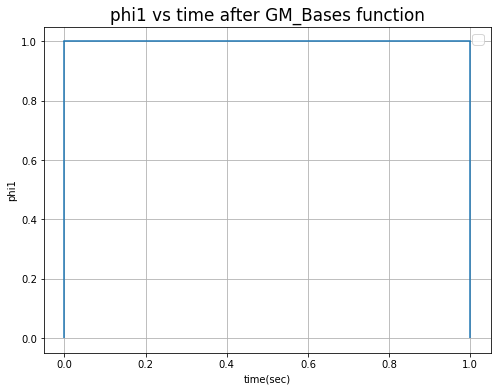

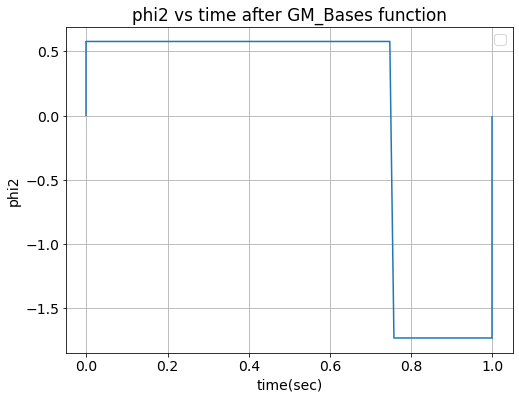

In [5]:
phi1,phi2 = GM_Bases(s1,s2)
x_axis_time = np.linspace(0,1,number_of_samples)

def plot_GM_Bases(phi,index):
    plt.figure(figsize=(8, 6))
    plt.grid(True)
    plt.plot(x_axis_time,phi)
    plt.vlines(x=0,ymin=0, ymax=phi[0])
    plt.vlines(x=1,ymin=phi[-1], ymax=0)
    plt.rcParams.update({'font.size': 14})
    plt.title('phi' + str(index) +' vs time after GM_Bases function')
    plt.xlabel('time(sec)')
    plt.ylabel('phi'+ str(index))
    plt.legend()
    
plot_GM_Bases(phi1,1)
plot_GM_Bases(phi2,2)

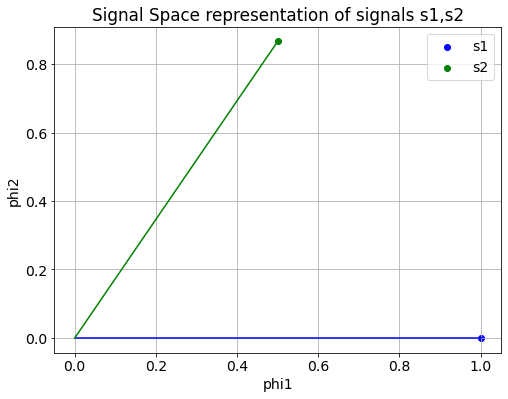

In [6]:
v11, v21 = signal_space(s1,phi1,phi2)
v12, v22 = signal_space(s2,phi1,phi2)
# plot
plt.figure(figsize=(8, 6))
plt.grid(True)
plt.scatter(v11, v21, c='b', label='s1')
plt.scatter(v12, v22, c='g', label='s2')
plt.plot([0, v11], [0, v21], 'b')
plt.plot([0, v12], [0, v22], 'g')
plt.rcParams.update({'font.size': 14})
plt.title('Signal Space representation of signals s1,s2')
plt.xlabel('phi1')
plt.ylabel('phi2')
plt.legend()


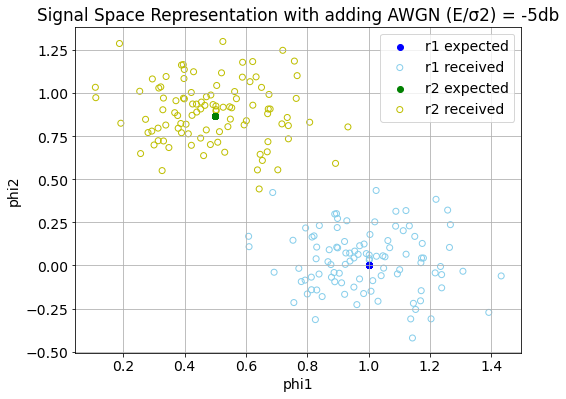

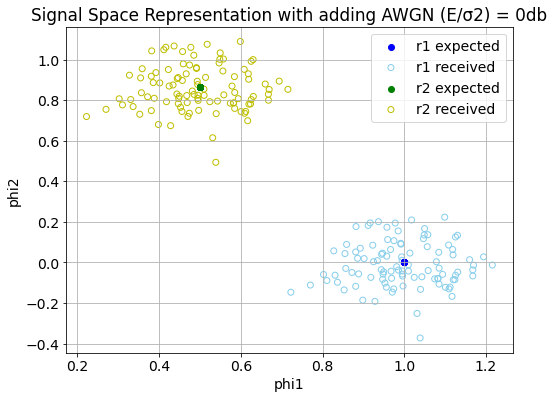

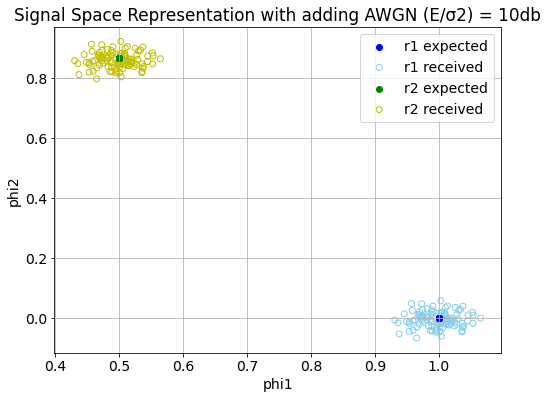

In [8]:
E_sig2 = [-5, 0, 10]

for i in range(0, 3):
    plt.figure(figsize=(8, 6))
    plt.grid(True)
    plt.rcParams.update({'font.size': 14})
    plt.title('Signal Space Representation with adding AWGN (E/σ2) = '+ str(E_sig2[i]) +
    'db')
    plt.xlabel('phi1')
    plt.ylabel('phi2')
    
    for j in range(number_of_samples):
        # generate gaussian noise with mean=0,variance=sigma^2 (standard deviation=sigma)
        E_sig = 10 ** ( E_sig2[i] / 10) # convert from db -> E/sigma^2
        E = np.sum(s1 ** 2)/number_of_samples # E is the energy of s1(t)
        sigma = np.sqrt(E/(E_sig)) # variance: sigma^2 = E/(E/sigma^2)
        w = np.random.normal(0 , sigma, number_of_samples) # noise
        # s1
        r1 = s1 + w
        v11_noise, v21_noise = signal_space(r1,phi1,phi2)
        plt.scatter(v11, v21, c='b', label='r1 expected')
        plt.scatter(v11_noise, v21_noise, marker='o',label='r1 received',facecolors='none',edgecolors='skyblue')
        #s2
        r2 = s2 + w
        v12_noise, v22_noise = signal_space(r2,phi1,phi2)
        plt.scatter(v12, v22, c='g', label='r2 expected')
        plt.scatter(v12_noise, v22_noise, marker='o',label='r2 received',facecolors='none',edgecolors='y')
                    
    plt.legend(['r1 expected','r1 received','r2 expected','r2 received'])